In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib.cm as cm


In [2]:
n = 7 #Number of points 5, 9
points = np.linspace(-6,6,n).reshape(1,n) #Creating Single of points from -1 to 1
xv, yv, zv = np.meshgrid(points, points, points, indexing = 'xy') #Using Meshgrid to get 2 arrays with points.

def get_dl(theta, r):
    return np.array([r * np.cos(theta), r * np.sin(theta), 0])

def magnetic_field_loop(r):
    r = r
    ones = np.ones((n,n,n))
    theta = 0
    dtheta = 2*np.pi/50
    x_circle = []
    y_circle = []
    z_circle = []
    
    Bx = np.zeros((n,n,n))
    By = np.zeros((n,n,n)) 
    Bz = np.zeros((n,n,n))
    B  = 1
    
    while theta < 2*np.pi:
        dl_int  = get_dl(theta,r)
        dl_final = get_dl(theta + dtheta/2, r)
        dl = dl_final - dl_int
        
        x_circle.append(dl_int[0])
        y_circle.append(dl_int[1])
        z_circle.append(dl_int[2])
        
        rx = xv - dl_int[0]
        ry = yv - dl_int[1]
        rz = zv - dl_int[2]
        
        #B = 2/np.sqrt(rx**2 + ry**2 + rz**2)
    
        for z in range(n):
            for x in range(n):
                for y in range(n):
                    # Gets x and y components of difference array, normalizes it, and crosses it with dl
                    temp = np.array((rx[x,y,z], ry[x,y,z], rz[x,y,z]))
                    temp = temp / np.sqrt(rx[x,y,z]**2 + ry[x,y,z]**2 + rz[x,y,z]**2)
                    tempcross = np.cross(dl, temp)
                    Bx[x,y,z] += tempcross[0] #Adds to magnetic field array of x-components the x-component of the cross product
                    By[x,y,z] += tempcross[1] #Same for y
                    Bz[x,y,z] += tempcross[2]
        Bx *= B
        By *= B
        Bz *= B
        theta += dtheta
        
    return [Bx, By, Bz, x_circle, y_circle, z_circle]

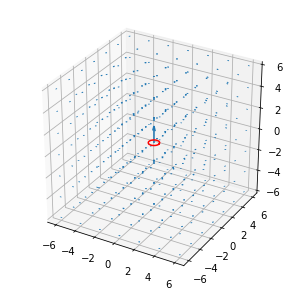

In [3]:
Bx, By, Bz, x_circle, y_circle, z_circle = magnetic_field_loop(.5)
fig = plt.figure(figsize = (5,5))
ax = fig.gca(projection='3d')
plt.quiver(xv,yv,zv,Bx,By,Bz, length = 1)
plt.plot(x_circle, y_circle, z_circle, 'r')
plt.show()

For Z=0


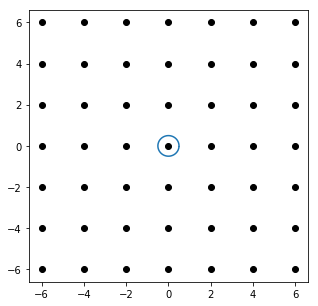

In [4]:
fig = plt.figure(figsize = (5,5))
plt.plot(xv[:,:,3], yv[:,:,3], 'ko')
plt.plot(x_circle, y_circle)
print('For Z=0')

For Z=2


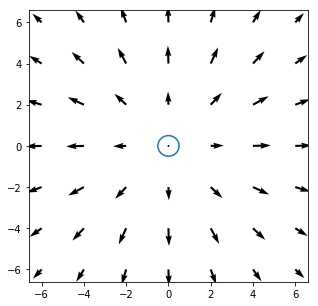

In [5]:
fig = plt.figure(figsize = (5,5))
plt.quiver(xv[:,:,-1], yv[:,:,-1], Bx[:,:,-1], By[:,:,-1])
plt.plot(x_circle, y_circle)
print('For Z=2')

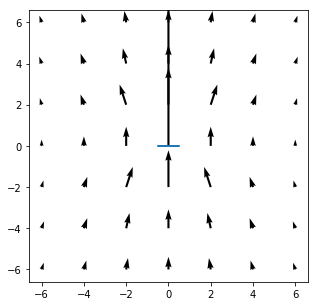

In [6]:
fig = plt.figure(figsize = (5,5))
plt.quiver(yv[:,3,:], zv[:,3,:], By[:,3,:], Bz[:,3,:])
plt.plot(y_circle, z_circle)

In [51]:
n = 7 #Number of points 5, 9
xpoints = np.linspace(-1,1,n).reshape(1,n) #Creating Single of points from -1 to 1
ypoints = np.linspace(-1,1,n).reshape(1,n) #Creating Single of points from -1 to 1
zpoints = np.linspace(-6,6,n).reshape(1,n) #Creating Single of points from -1 to 1

xv, yv, zv = np.meshgrid(xpoints, ypoints, zpoints, indexing = 'xy') #Using Meshgrid to get 2 arrays with points.

def get_dl(theta, r):
    return np.array([r * np.cos(theta), r * np.sin(theta), 0])

def magnetic_field_loop(r):
    r = r
    ones = np.ones((n,n,n))
    theta = 0
    dtheta = 2*np.pi/50
    x_circle = []
    y_circle = []
    z_circle = []
    
    Bx = np.zeros((n,n,n))
    By = np.zeros((n,n,n)) 
    Bz = np.zeros((n,n,n))
    B  = 1
    
    while theta < 2*np.pi:
        dl_int  = get_dl(theta,r)
        dl_final = get_dl(theta + dtheta, r)
        dl = dl_final - dl_int
        
        
        x_circle.append(dl_int[0])
        y_circle.append(dl_int[1])
        z_circle.append(dl_int[2])
        
        rx = xv - dl_int[0]
        ry = yv - dl_int[1]
        rz = zv - dl_int[2]
        for z in range(n):
            for x in range(n):
                for y in range(n):
                    # Gets x and y components of difference array, normalizes it, and crosses it with dl
                    temp = np.array((rx[x,y,z], ry[x,y,z], rz[x,y,z]))
                    temp = temp / np.sqrt(rx[x,y,z]**2 + ry[x,y,z]**2 + rz[x,y,z]**2)
                    tempcross = np.cross(dl, temp)
                    tempcross = tempcross / r**2
                    Bx[x,y,z] += tempcross[0] #Adds to magnetic field array of x-components the x-component of the cross product
                    By[x,y,z] += tempcross[1] #Same for y
                    Bz[x,y,z] += tempcross[2]
        Bx *= B
        By *= B
        Bz *= B
        theta += dtheta
        
    return [Bx, By, Bz, x_circle, y_circle, z_circle]

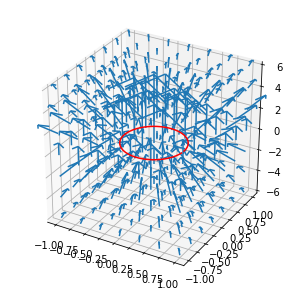

In [52]:
Bx, By, Bz, x_circle, y_circle, z_circle = magnetic_field_loop(.5)
fig = plt.figure(figsize = (5,5))
ax = fig.gca(projection='3d')
plt.quiver(xv,yv,zv,Bx,By,Bz,length = .5)
plt.plot(x_circle, y_circle, z_circle, 'r')
plt.show()


For Z=2


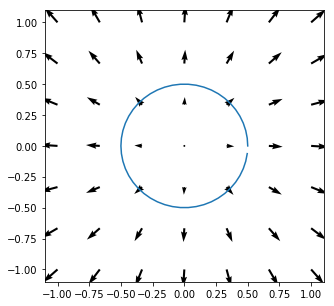

In [45]:
fig = plt.figure(figsize = (5,5))
i = 4
plt.quiver(xv[:,:,i], yv[:,:,i], Bx[:,:,i], By[:,:,i])
plt.plot(x_circle, y_circle)
print('For Z=2')

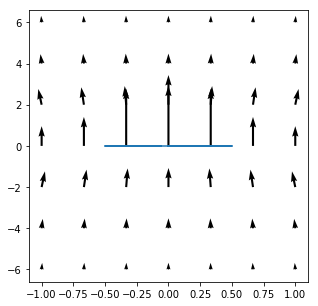

In [26]:
fig = plt.figure(figsize = (5,5))
plt.quiver(yv[:,2,:], zv[:,2,:], By[:,2,:], Bz[:,2,:])
plt.plot(y_circle, z_circle)

In [24]:
np.linspace(-6,6,7)

array([-6., -4., -2.,  0.,  2.,  4.,  6.])

In [127]:
n = 7 #Number of points 5, 9

def get_exponential(num):
    if abs(num) > 10:
        n = 0
        while abs(num) > 10:
            num /= 10
            n -= 1
        return n
    if abs(num) < 1:
        n = 0
        while abs(num) < 1:
            num *= 10
            n += 1
        return n
    
xpoints = np.linspace(-1,1,n).reshape(1,n) #Creating Single of points from -1 to 1
ypoints = np.linspace(-1,1,n).reshape(1,n) #Creating Single of points from -1 to 1
zpoints = np.linspace(-6,6,n).reshape(1,n) #Creating Single of points from -1 to 1

xv, yv, zv = np.meshgrid(xpoints, ypoints, zpoints, indexing = 'xy') #Using Meshgrid to get 2 arrays with points.

def get_dl(theta, r):
    return np.array([r * np.cos(theta), r * np.sin(theta), 0])

def magnetic_field_loop(r):
    r = r
    ones = np.ones((n,n,n))
    theta = 0
    dtheta = 2*np.pi/50
    x_circle = []
    y_circle = []
    z_circle = []
    
    Bx = np.zeros((n,n,n))
    By = np.zeros((n,n,n)) 
    Bz = np.zeros((n,n,n))
    B  = 1
    
    while theta < 2*np.pi:
        dl_int  = get_dl(theta,r)
        dl_final = get_dl(theta + dtheta, r)
        dl = dl_final - dl_int
        
        x_circle.append(dl_int[0])
        y_circle.append(dl_int[1])
        z_circle.append(dl_int[2])
        
#         rx = xv - dl_int[0]
#         ry = yv - dl_int[1]
#         rz = zv - dl_int[2]
        
#         magnitude = np.sqrt(np.power(rx, 2) + np.power(ry, 2) + np.power(rz, 2))
#         B = np.power(magnitude, -3)
        
        for z in range(n):
            for x in range(n):
                for y in range(n):
                    # Gets x and y components of difference array, normalizes it, and crosses it with dl
                    
                    #temp = np.array((rx[x,y,z], ry[x,y,z], rz[x,y,z]))
                    temp = np.array((xv[x,y,z], yv[x,y,z], zv[x,y,z])) - dl_int
                    
                   #magnitude = np.sqrt(rx[x,y,z]**2 + ry[x,y,z]**2 + rz[x,y,z]**2)
                    tempcross = np.cross(dl, temp)
                    tempcross /= np.sqrt(tempcross[0]**2 + tempcross[1]**2 + tempcross[2]**2)
                    Bx[x,y,z] += tempcross[0]#/np.power(magnitude, 3) #Adds to magnetic field array of x-components the x-component of the cross product
                    By[x,y,z] += tempcross[1]#/np.power(magnitude, 3) #Same for y
                    Bz[x,y,z] += tempcross[2]#/np.power(magnitude, 3)
        Bx *= B
        By *= B
        Bz *= B
        theta += dtheta
        
        
    return [Bx, By, Bz, x_circle, y_circle, z_circle]

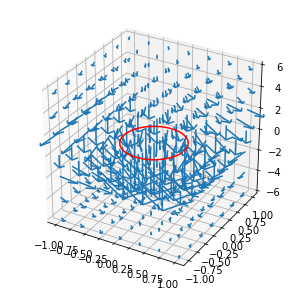

In [128]:
Bx, By, Bz, x_circle, y_circle, z_circle = magnetic_field_loop(.5)
fig = plt.figure(figsize = (5,5))
ax = fig.gca(projection='3d')
plt.quiver(xv,yv,zv,Bx,By,Bz, length= .1)
plt.plot(x_circle, y_circle, z_circle, 'r')
plt.show()

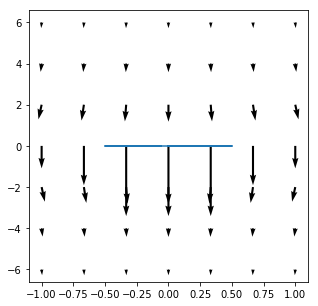

In [129]:
fig = plt.figure(figsize = (5,5))
plt.quiver(yv[:,3,:], zv[:,3,:], By[:,3,:], Bz[:,3,:])
plt.plot(y_circle, z_circle)

For Z=2


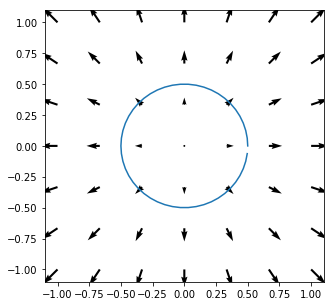

In [123]:
fig = plt.figure(figsize = (5,5))
i = 4
plt.quiver(xv[:,:,i], yv[:,:,i], Bx[:,:,i], By[:,:,i])
plt.plot(x_circle, y_circle)
print('For Z=2')

In [103]:
Bx[:,4,:]

array([[-0.11054521, -0.23612854, -0.74451144,  0.        ,  0.74451144,
         0.23612854,  0.11054521],
       [-0.11240554, -0.24474595, -0.83637222,  0.        ,  0.83637222,
         0.24474595,  0.11240554],
       [-0.11354953, -0.25019496, -0.901331  ,  0.        ,  0.901331  ,
         0.25019496,  0.11354953],
       [-0.11393562, -0.25206043, -0.9249201 ,  0.        ,  0.9249201 ,
         0.25206043,  0.11393562],
       [-0.11354953, -0.25019496, -0.901331  ,  0.        ,  0.901331  ,
         0.25019496,  0.11354953],
       [-0.11240554, -0.24474595, -0.83637222,  0.        ,  0.83637222,
         0.24474595,  0.11240554],
       [-0.11054521, -0.23612854, -0.74451144,  0.        ,  0.74451144,
         0.23612854,  0.11054521]])

In [104]:
By[4,:,:]

array([[-0.11054521, -0.23612854, -0.74451144,  0.        ,  0.74451144,
         0.23612854,  0.11054521],
       [-0.11240554, -0.24474595, -0.83637222,  0.        ,  0.83637222,
         0.24474595,  0.11240554],
       [-0.11354953, -0.25019496, -0.901331  ,  0.        ,  0.901331  ,
         0.25019496,  0.11354953],
       [-0.11393562, -0.25206043, -0.9249201 ,  0.        ,  0.9249201 ,
         0.25206043,  0.11393562],
       [-0.11354953, -0.25019496, -0.901331  ,  0.        ,  0.901331  ,
         0.25019496,  0.11354953],
       [-0.11240554, -0.24474595, -0.83637222,  0.        ,  0.83637222,
         0.24474595,  0.11240554],
       [-0.11054521, -0.23612854, -0.74451144,  0.        ,  0.74451144,
         0.23612854,  0.11054521]])

In [106]:
yv[:,2,:]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        ],
       [-0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
        -0.66666667, -0.66666667],
       [-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333],
       [ 0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
         0.66666667,  0.66666667],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ]])

In [243]:
def get_dl(theta, r):
    return np.array([r * np.cos(theta), r * np.sin(theta), 0])

def magnetic_field_new(r, n, x_span, y_span, z_span):
    xpoints = np.linspace(-x_span, x_span, n)
    ypoints = np.linspace(-y_span, y_span, n)
    zpoints = np.linspace(-z_span, z_span, n)
    
    xx, yy, zz = np.meshgrid(xpoints, ypoints, zpoints)
    
    x_circle = []
    y_circle = []
    z_circle = []
    
    Bx = np.zeros((n,n,n))
    By = np.zeros((n,n,n))
    Bz = np.zeros((n,n,n))

    theta = 0
    dtheta = np.pi/50
    
    while theta < 2*np.pi:
        
        rpos = get_dl(theta, r)
        dl = get_dl(theta + dtheta, r) - rpos
        
        x_circle.append(rpos[0])
        y_circle.append(rpos[1])
        z_circle.append(rpos[2])
        
        for x in range(n):
            for y in range(n):
                for z in range(n):
                    robs = np.array([xx[x,y,z], yy[x,y,z], zz[x,y,z]]) - rpos                  
                    dl_cross_robs = np.cross(dl, robs)
                    magnitude = np.sqrt(robs[0]**2 + robs[1]**2 + robs[2]**2)
                    
                    Bx[x,y,z] += dl_cross_robs[0] / np.power(magnitude, 3)
                    By[x,y,z] += dl_cross_robs[1] / np.power(magnitude, 3)
                    Bz[x,y,z] += dl_cross_robs[2] / np.power(magnitude, 3)
                    
        theta += dtheta
        
    for x in range(n):
        for y in range(n):
            for z in range(n):
                magnitude = np.sqrt(Bx[x,y,z]**2 + By[x,y,z]**2 + Bz[x,y,z]**2)
                Bx[x,y,z] /= magnitude
                By[x,y,z] /= magnitude
                Bz[x,y,z] /= magnitude
        
    return xx, yy, zz, Bx, By, Bz, x_circle, y_circle, z_circle

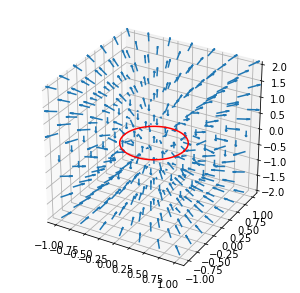

In [244]:
xx, yy, zz, Bx, By, Bz, x_circle, y_circle, z_circle = magnetic_field_new(.5, 7, 1, 1, 2)
fig = plt.figure(figsize = (5,5))
ax = fig.gca(projection='3d')
plt.quiver(xx,yy,zz,Bx,By,Bz, length= .2)
plt.plot(x_circle, y_circle, z_circle, 'r')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


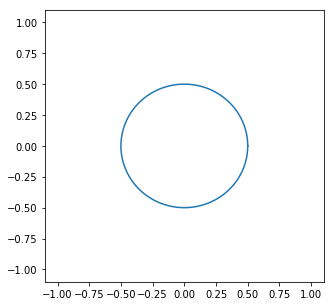

In [260]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
ax.quiver(xx[:,:,3],yy[:,:,3],Bx[:,:,3],By[:,:,3])
plt.plot(x_circle, y_circle)

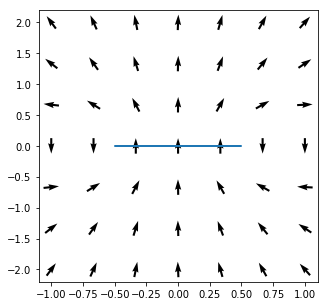

In [258]:
fig = plt.figure(figsize = (5,5))
plt.quiver(xx[3,:,:], zz[3,:,:], Bx[3,:,:], Bz[3,:,:], pivot = 'mid')
plt.plot(y_circle, z_circle)

For Z=2


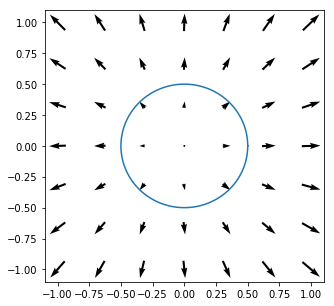

In [253]:
fig = plt.figure(figsize = (5,5))
i = -1
plt.quiver(xx[:,:,i], yy[:,:,i], Bx[:,:,i], By[:,:,i], pivot = 'mid')
plt.plot(x_circle, y_circle)
print('For Z=2')

In [262]:
Bx[:,:,3].shape

(7, 7)